In [36]:
#Importa os pacotes
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

%matplotlib inline

In [37]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

**1.Carregar dataset com os dados tratados e mesclados**

In [38]:
caminho_arquivo_tratado = "./v2/historico_precos_com_regioes.zip"
df = pd.read_csv(caminho_arquivo_tratado, parse_dates=["Data_Coleta"])
df.head()

,Produto,Data_Coleta,Valor_Venda_Litro_Em_Reais,Valor_Compra_Litro_Em_Reais,Ano_Coleta,Mes_Coleta,Dia_Coleta,Mes_Ano_Coleta,Nome_Regiao,Municipio
0,DIESEL S10,2016-02-01,3.237,-1.0,2016,2,1,2016-02,Sul de Minas,ALFENAS
1,DIESEL S10,2016-05-02,3.237,-1.0,2016,5,2,2016-05,Sul de Minas,ALFENAS
2,DIESEL S10,2016-01-04,3.197,-1.0,2016,1,4,2016-01,Sul de Minas,ALFENAS
3,DIESEL S10,2016-04-04,3.237,-1.0,2016,4,4,2016-04,Sul de Minas,ALFENAS
4,DIESEL S10,2016-06-06,3.209,-1.0,2016,6,6,2016-06,Sul de Minas,ALFENAS


**2.Informações do dataframe**

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465446 entries, 0 to 465445
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Produto                      465446 non-null  object        
 1   Data_Coleta                  465446 non-null  datetime64[ns]
 2   Valor_Venda_Litro_Em_Reais   465446 non-null  float64       
 3   Valor_Compra_Litro_Em_Reais  465446 non-null  float64       
 4   Ano_Coleta                   465446 non-null  int64         
 5   Mes_Coleta                   465446 non-null  int64         
 6   Dia_Coleta                   465446 non-null  int64         
 7   Mes_Ano_Coleta               465446 non-null  object        
 8   Nome_Regiao                  465446 non-null  object        
 9   Municipio                    465446 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 35.5+ MB


**3.Resumo do dataframe**

In [40]:
df.describe(include="all")

,Produto,Data_Coleta,Valor_Venda_Litro_Em_Reais,Valor_Compra_Litro_Em_Reais,Ano_Coleta,Mes_Coleta,Dia_Coleta,Mes_Ano_Coleta,Nome_Regiao,Municipio
count,465446,465446,465446.000000,465446.000000,465446.000000,465446.000000,465446.000000,465446,465446,465446
unique,5,1003,NaN,NaN,NaN,NaN,NaN,60,10,64
top,ETANOL,2020-08-17 00:00:00,NaN,NaN,NaN,NaN,NaN,2017-05,Central,UBERLÂNDIA
freq,137751,1668,NaN,NaN,NaN,NaN,NaN,10058,130484,27349
first,NaN,2016-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2021-01-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,3.542522,0.440058,2017.899679,6.034833,15.622145,NaN,NaN,NaN
std,NaN,NaN,0.649963,1.986675,1.387501,3.375910,8.723410,NaN,NaN,NaN
min,NaN,NaN,1.999000,-1.000000,2016.000000,1.000000,1.000000,NaN,NaN,NaN
25%,NaN,NaN,3.040000,-1.000000,2017.000000,3.000000,8.000000,NaN,NaN,NaN


**4.Analise Univariada**

**4.0 Funcoes**

**4.0.1 Tabela de Frequencia**

In [41]:
def frequency_table(df, colname):
    grouped_series = df.groupby(colname).size()
    grouped_series.name = "Freq_Absoluta"
    df_frequency = grouped_series.to_frame()
    df_frequency["Freq_Relativa"] = df_frequency["Freq_Absoluta"] / len(df)
    df_frequency["Freq_Percentual"] = df_frequency["Freq_Relativa"] * 100.0
    return df_frequency

**4.0.2 Grafico de Frequencia Relativa**

In [42]:
def plot_relative_frequency_chart(df, subtitleX, textAdjustX = None, textAdjustY = None, tickRotation = False): 
    if textAdjustX is None:
        textAdjustX = - 0.10
    if textAdjustY is None:
        textAdjustY = 0.8
    
    freq_fig = plt.figure(figsize=(15, 3))
    freq_fig.subplots_adjust(top=1.3)    
    freq_fig.set_size_inches(15, 5) 
    plt.bar(df.index, df["Freq_Percentual"], figure=freq_fig)
    xlocs, xlabs = plt.xticks()
    plt.xlabel(subtitleX, fontweight='bold')
    plt.ylabel("Frequência Relativa (%)", fontweight='bold')
    plt.title("Frequência Relativa x {}".format(subtitleX), fontweight='bold')
    
    for i, v in enumerate(df["Freq_Percentual"]):    
        plt.text(xlocs[i] + textAdjustX, v + textAdjustY, str(round(v, 2)) + " %", color='blue', va='center', fontweight='bold')    
        
    
    if tickRotation:
        locs, labels = plt.xticks()
        for label in labels:
            label.set_rotation(55)
    
    #plt.autoscale(enable=False, axis='both', tight=None)
    plt.savefig("img/frequencia_relativa_{}.png".format(subtitleX), bbox_inches = 'tight',pad_inches =0.5)    
    plt.show()

**4.1 Produto**

**4.1.1 Tabela de Frequencia**

In [43]:
df_produto = frequency_table(df, "Produto")
df_produto

,Freq_Absoluta,Freq_Relativa,Freq_Percentual
Produto,,,
DIESEL,92279,0.198259,19.825930
DIESEL S10,97889,0.210312,21.031226
ETANOL,137751,0.295955,29.595485
GASOLINA,136154,0.292524,29.252373
GNV,1373,0.002950,0.294986


**4.1.2 Grafico de frequencia relativa**

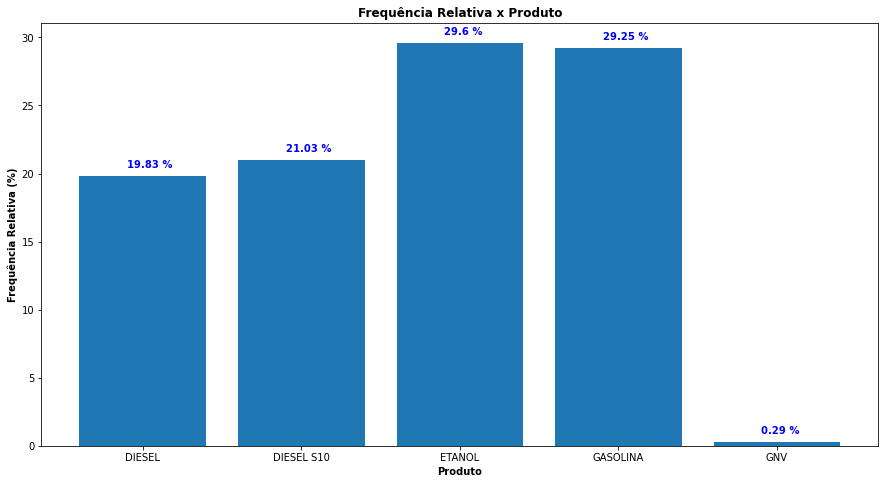

In [44]:
plot_relative_frequency_chart(df_produto,"Produto")

**4.2 Ano Coleta**

**4.2.1 Tabela de Frequencia**

In [45]:
df_ano_coleta = frequency_table(df, "Ano_Coleta")
df_ano_coleta

,Freq_Absoluta,Freq_Relativa,Freq_Percentual
Ano_Coleta,,,
2016,105829,0.227371,22.737117
2017,83149,0.178644,17.864371
2018,100060,0.214977,21.497660
2019,106079,0.227908,22.790829
2020,68953,0.148144,14.814393
2021,1376,0.002956,0.295630


**4.2.2 Grafico de frequencia relativa**

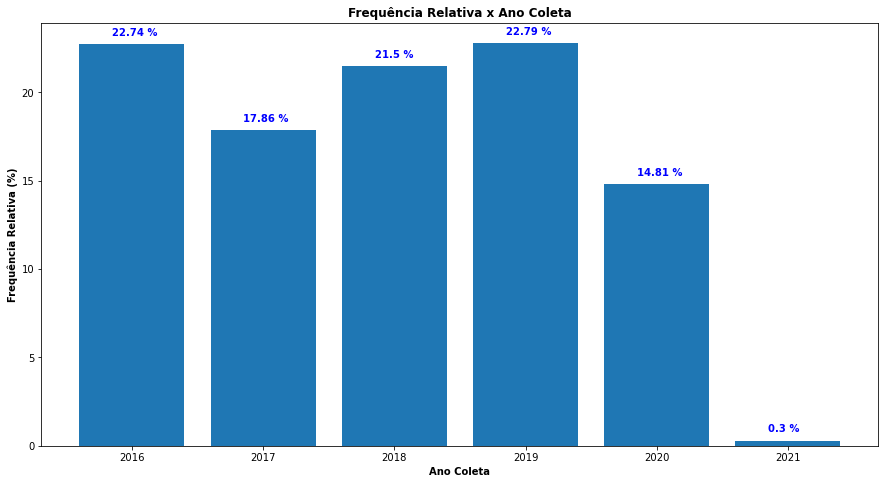

In [46]:
plot_relative_frequency_chart(df_ano_coleta, "Ano Coleta", 0.85, 0.65)

**4.3 Regiao de Planejamento**

**4.3.1 Tabela de Frequencia**

In [47]:
df_regiao = frequency_table(df, "Nome_Regiao")
df_regiao

,Freq_Absoluta,Freq_Relativa,Freq_Percentual
Nome_Regiao,,,
Alto Paranaíba,29561,0.063511,6.351113
Central,130484,0.280342,28.034187
Centro-Oeste,35880,0.077087,7.708735
Jequitinhonha-Mucuri,8427,0.018105,1.810522
Mata,40586,0.087198,8.719809
Noroeste,19587,0.042082,4.208222
Norte,21722,0.046669,4.666922
Rio Doce,34049,0.073153,7.315349
Sul de Minas,68416,0.146990,14.699020


**4.3.2 Grafico de Frequencia relativa**

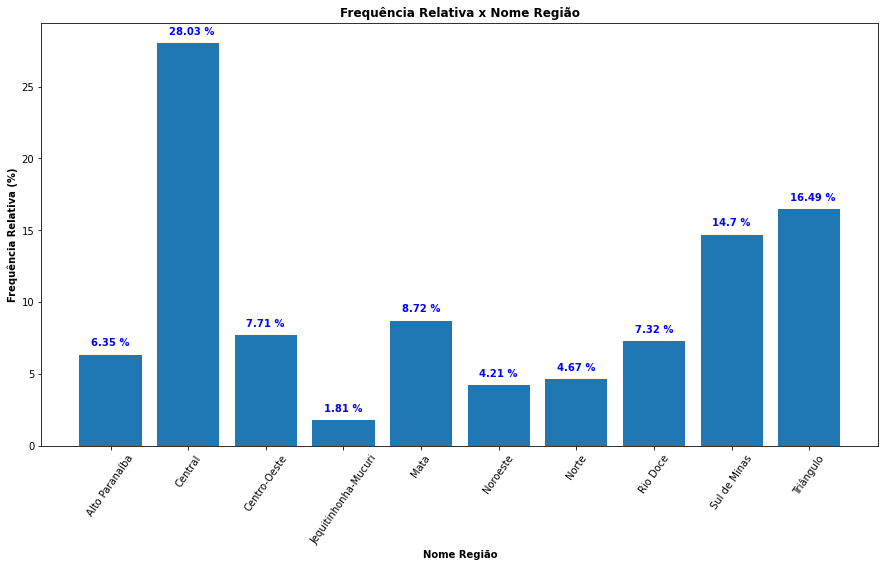

In [48]:
plot_relative_frequency_chart(df_regiao, "Nome Região", -0.25, tickRotation=True)

**4.4. Valor Venda**

**4.4.1 Quebra em classes de valores**

In [49]:
#Quebra em 10 classes
df["Classe_Venda_Litro_Em_Reais"] = pd.cut(df["Valor_Venda_Litro_Em_Reais"], 10, right=False)
df["Classe_Venda_Litro_Em_Reais"].unique()

[[3.139, 3.519), [2.759, 3.139), [2.379, 2.759), [3.519, 3.899), [3.899, 4.279), [1.999, 2.379), [4.279, 4.659), [4.659, 5.039), [5.039, 5.419), [5.419, 5.803)]
Categories (10, interval[float64]): [[1.999, 2.379) < [2.379, 2.759) < [2.759, 3.139) < [3.139, 3.519) ... [4.279, 4.659) < [4.659, 5.039) < [5.039, 5.419) < [5.419, 5.803)]

**4.4.2 Tabela de Frequencia**

In [50]:
df_valor_venda = frequency_table(df, "Classe_Venda_Litro_Em_Reais")
df_valor_venda

,Freq_Absoluta,Freq_Relativa,Freq_Percentual
Classe_Venda_Litro_Em_Reais,,,
"[1.999, 2.379)",2010,0.004318,0.431844
"[2.379, 2.759)",32385,0.069578,6.957843
"[2.759, 3.139)",120693,0.259306,25.930613
"[3.139, 3.519)",96346,0.206997,20.699716
"[3.519, 3.899)",100427,0.215765,21.576509
"[3.899, 4.279)",39187,0.084192,8.419237
"[4.279, 4.659)",28885,0.062059,6.205876
"[4.659, 5.039)",42134,0.090524,9.052393
"[5.039, 5.419)",3357,0.007212,0.721244


**4.4.3 Grafico de Frequencia relativa**

In [51]:
def plot_histograma_valor(df, nome_coluna, desc_coluna):
    pesos_freq = (np.zeros_like(df[nome_coluna]) + 1. / df[nome_coluna].size) * 100
    freq_fig = plt.figure(figsize=(15, 3))
    freq_fig.subplots_adjust(top=1.3)    
    freq_fig.set_size_inches(15, 5) 
    lista = plt.hist(df[nome_coluna], bins=10, weights=pesos_freq, figure=freq_fig)
    xlocs, xlabs = plt.xticks()
    plt.xlabel("Intervalos de preço", fontweight='bold')
    plt.ylabel("Frequência Relativa (%) ", fontweight='bold')
    plt.title("Histograma {}".format(desc_coluna), fontweight='bold')

    for i in range(10):        
        plt.text(lista[1][i] + 0.05, lista[0][i] + 0.35, str(round(lista[0][i],3)) + " %", color='blue', va='center', fontweight='bold')

    plt.savefig("img/histograma_{}.png".format(nome_coluna), bbox_inches = 'tight',pad_inches =0.5)    
    plt.show()

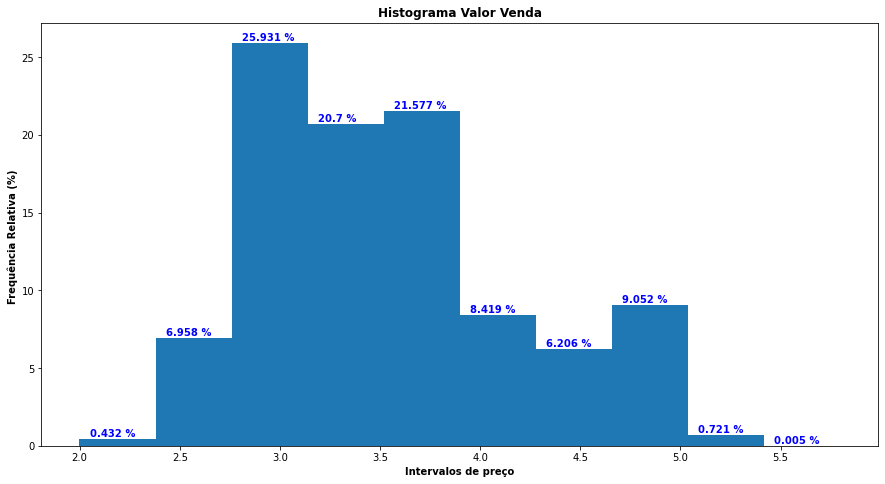

In [52]:
plot_histograma_valor(df, "Valor_Venda_Litro_Em_Reais", "Valor Venda")

**4.4.4 ECDF = Função de distribuição cumulativa**

In [53]:
def ecdf(data):
    #Quantidade de registros
    n = len(data)
    
    #dados do eixo x ordenados
    x = np.sort(data)
    
    #dados do eixo y 
    y = np.arange(1, n+1)/n
    
    return x,y

In [54]:
#Calcula ECDF para os dados de preco
x_preco, y_preco = ecdf(df["Valor_Venda_Litro_Em_Reais"])

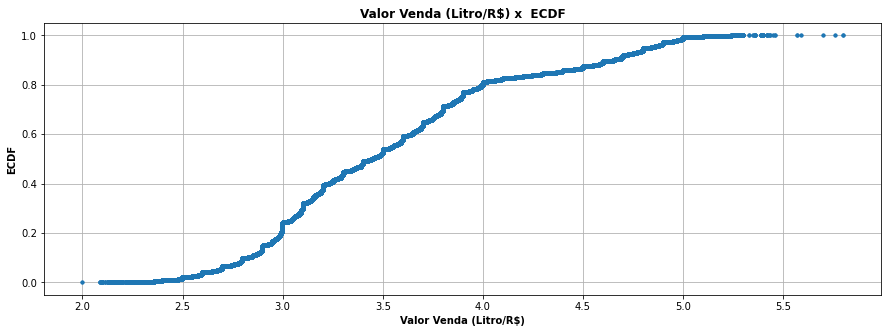

In [55]:
#Configura o grafico 
plt.figure(figsize= (15, 5))
plt.xlabel("Valor Venda (Litro/R$)", fontweight='bold')
plt.ylabel("ECDF", fontweight='bold')
plt.title("Valor Venda (Litro/R$) x  ECDF", fontweight='bold')

plt.plot(x_preco, y_preco, marker = ".",  linestyle = "none")
plt.grid()
plt.savefig("img/ecdf_valor_venda.png", bbox_inches = 'tight',pad_inches =0.5)    
plt.show()


**4.4.5 Espalhamento dos dados**

{'whiskers': [<matplotlib.lines.Line2D at 0x1b9cfa9c0a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b9cfa9cdc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b9cfa63160>],
 'medians': [<matplotlib.lines.Line2D at 0x1b9cfa9cc70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b9cfb8b7c0>],
 'means': []}

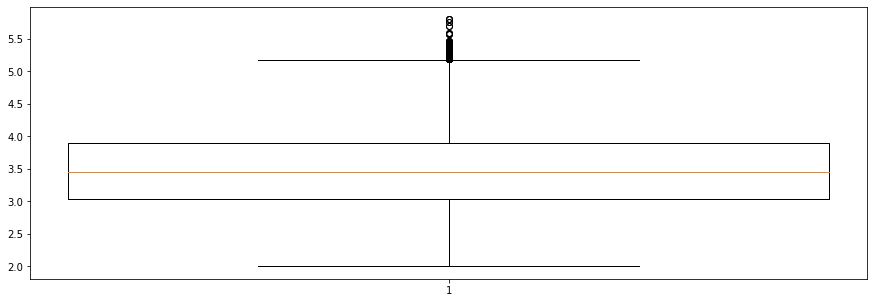

In [56]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.boxplot(df["Valor_Venda_Litro_Em_Reais"], widths=(15))

**4.5 Valor Compra**

In [57]:
#Remoção dos valores faltantes da coluna de Valor Compra
df_compra = df[df["Valor_Compra_Litro_Em_Reais"] > -1]  

**4.5.1 Quebra em classes de valores**

In [58]:
#Quebra em 10 classes
df_compra["Classe_Compra_Litro_Em_Reais"] = pd.cut(df_compra["Valor_Compra_Litro_Em_Reais"], 10, right=False)
df_compra["Classe_Compra_Litro_Em_Reais"].unique()

<ipython-input-58-7a624753daf3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_compra["Classe_Compra_Litro_Em_Reais"] = pd.cut(df_compra["Valor_Compra_Litro_Em_Reais"], 10, right=False)


[[2.565, 2.895), [2.236, 2.565), [3.224, 3.554), [1.906, 2.236), [2.895, 3.224), [1.577, 1.906), [3.554, 3.883), [3.883, 4.213), [4.213, 4.542), [4.542, 4.875)]
Categories (10, interval[float64]): [[1.577, 1.906) < [1.906, 2.236) < [2.236, 2.565) < [2.565, 2.895) ... [3.554, 3.883) < [3.883, 4.213) < [4.213, 4.542) < [4.542, 4.875)]

**4.5.2 Tabela de Frequencia**

In [59]:
df_valor_compra = frequency_table(df_compra, "Classe_Compra_Litro_Em_Reais")
df_valor_compra

,Freq_Absoluta,Freq_Relativa,Freq_Percentual
Classe_Compra_Litro_Em_Reais,,,
"[1.577, 1.906)",286,0.001745,0.174502
"[1.906, 2.236)",9189,0.056066,5.606638
"[2.236, 2.565)",20353,0.124183,12.418317
"[2.565, 2.895)",45135,0.275390,27.538973
"[2.895, 3.224)",23594,0.143958,14.395802
"[3.224, 3.554)",37250,0.227280,22.727966
"[3.554, 3.883)",5536,0.033778,3.377772
"[3.883, 4.213)",9612,0.058647,5.864730
"[4.213, 4.542)",11680,0.071265,7.126514


**4.5.3 Grafico de Frequencia relativa**

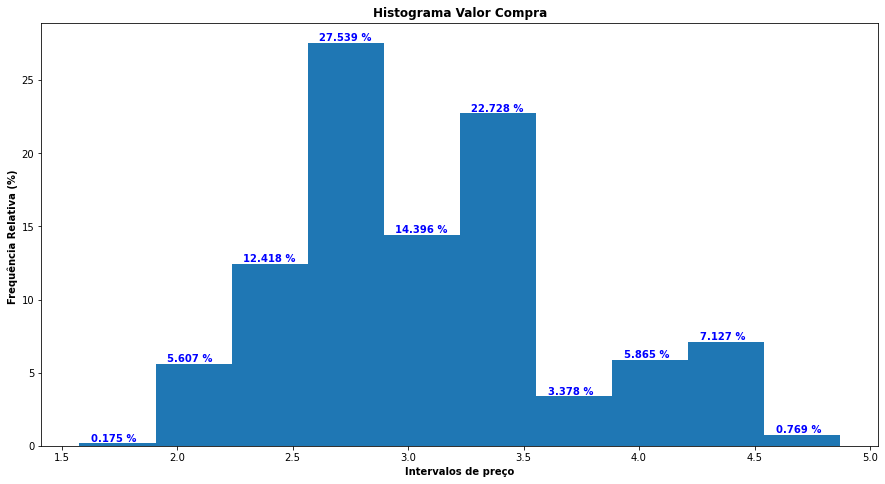

In [60]:
plot_histograma_valor(df_compra, "Valor_Compra_Litro_Em_Reais", "Valor Compra")

**4.5.4 ECDF = Função de distribuição cumulativa**

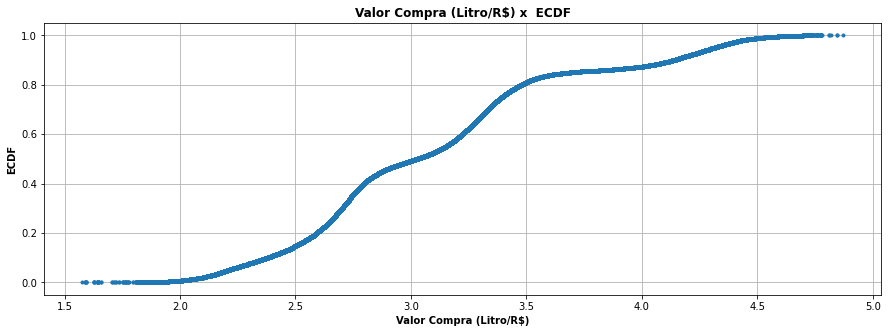

In [61]:
#Calcula ECDF para os dados de preco
x_preco, y_preco = ecdf(df_compra["Valor_Compra_Litro_Em_Reais"])

#Configura o grafico 
plt.figure(figsize= (15, 5))
plt.xlabel("Valor Compra (Litro/R$)", fontweight='bold')
plt.ylabel("ECDF", fontweight='bold')
plt.title("Valor Compra (Litro/R$) x  ECDF", fontweight='bold')

plt.plot(x_preco, y_preco, marker = ".",  linestyle = "none")
plt.grid()
plt.savefig("img/ecdf_valor_compra.png", bbox_inches = 'tight', pad_inches=0.5)
plt.show()


**4.5.5 Espalhamento dos dados**

{'whiskers': [<matplotlib.lines.Line2D at 0x1b9cf1b5430>,
 'caps': [<matplotlib.lines.Line2D at 0x1b9cf1b58e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b9cf1b5bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b9d0238e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b9d0238f70>],
 'means': []}

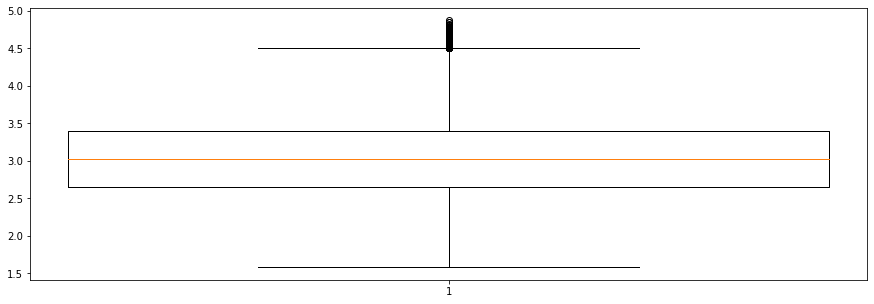

In [62]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.boxplot(df_compra["Valor_Compra_Litro_Em_Reais"], widths=(15))

**5.Análise Multivariada**

**5.0 Funcoes**

**5.0.1 Gerar Grafico de Data Coleta x Valor Por Produto isolado**

In [63]:
def plot_chart_data_valor_por_produto_isolado(df, df_compra, produto):
    df_prod = df[df["Produto"] == produto]    
    df_prod_compra = df_compra[df_compra["Produto"] == produto]
    
    fig, ax = plt.subplots(figsize=(15,5))    
    ax.set_title("Média de Preço Compra/Venda - {} x Ano".format(produto), fontweight='bold')
    
    #Venda    
    plt.plot(df_prod["Ano_Coleta"].unique(),\
             df_prod.groupby(["Ano_Coleta"]).mean()["Valor_Venda_Litro_Em_Reais"], marker="o", label="Valor Venda")
    
    #Compra    
    plt.plot(df_prod_compra["Ano_Coleta"].unique(),\
             df_prod_compra.groupby(["Ano_Coleta"]).mean()["Valor_Compra_Litro_Em_Reais"], marker="o", label="Valor Compra")
    
    
    plt.legend()
    plt.ylabel("Valor (R$/l)", fontweight='bold')
    plt.xlabel("Ano", fontweight='bold')
    plt.grid()
    plt.savefig("img/media_precos_{}_ano.png".format(produto), bbox_inches = 'tight',pad_inches =0.5)
    plt.show()


**5.0.2 Grafico de correlação entre Data Coleta x Valores de Produto Separado por Região**

In [116]:
def plot_chart_data_valor_por_produto_e_regiao(df, produto, coluna_valor, label_valor):
    df_prod = df[df["Produto"] == produto]
    
    qtd_regioes = len(df_prod["Nome_Regiao"].unique())
    fig, ax = plt.subplots(figsize=(15,15))
    regioes = df_prod["Nome_Regiao"].unique()
    ax.set_title("Média de Preço de {} - {} x Região".format(label_valor, produto), fontweight='bold')
    for idx in range(1, qtd_regioes + 1):
        regiao = regioes[idx - 1]
        df_regiao = df_prod[df_prod["Nome_Regiao"] == regiao]
        anos_regiao = df_regiao["Ano_Coleta"].unique()
        valores_regiao = df_regiao.groupby("Ano_Coleta").mean()[coluna_valor]

        plt.plot(anos_regiao, valores_regiao, marker="o", label=regiao)
        plt.ylabel("{} (R$/l)".format(label_valor), fontweight='bold') 
        plt.legend()          
    
    plt.xlabel("Região", fontweight='bold')
    plt.savefig("img/media_precos_{}_{}_ano_regiao.png".format(label_valor, produto), bbox_inches = 'tight',pad_inches =0.5)
    ax.grid()
    plt.show()

**5.0.3 Gerar Grafico de Ano de Coleta x Valor Por Produto**

In [65]:
def plot_chart_data_valor_por_produto(df, coluna_valor, label_valor):
    df_prod = df
    produtos = df_prod["Produto"].unique()
    
    fig, ax = plt.subplots(figsize=(15,5))
    for idx in range(1, len(produtos) + 1):
        produto = produtos[idx - 1]
        df_produto = df_prod[df_prod["Produto"] == produto]
        anos_produto = df_prod["Ano_Coleta"].unique()
        valores_produto = df_produto.groupby("Ano_Coleta").mean()[coluna_valor]

        plt.plot(anos_produto, valores_produto, marker="o", label=produto)
        plt.xticks(anos_produto)
        plt.ylabel("Valor Médio {} (R$/l)".format(label_valor), fontweight='bold') 
        plt.legend()    
    
    ax.set_title("Média de Preços de {} x Ano".format(label_valor), fontweight='bold')   
    plt.xlabel("Ano", fontweight='bold')
    ax.grid()
    plt.savefig("img/media_precos_{}_ano.png".format(label_valor), bbox_inches = 'tight',pad_inches =0.5)  
    plt.show()
    

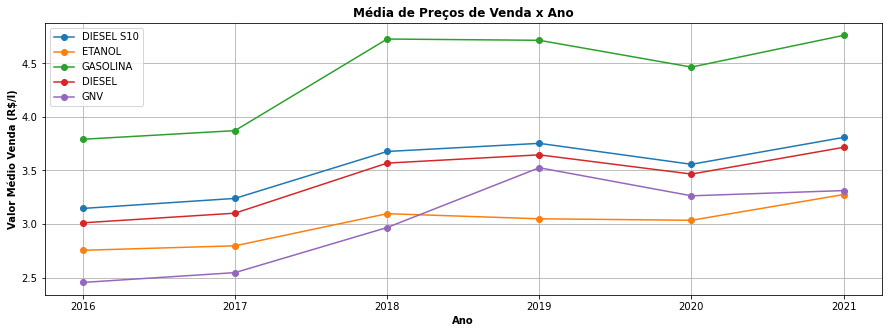

In [66]:
plot_chart_data_valor_por_produto(df, "Valor_Venda_Litro_Em_Reais", "Venda")

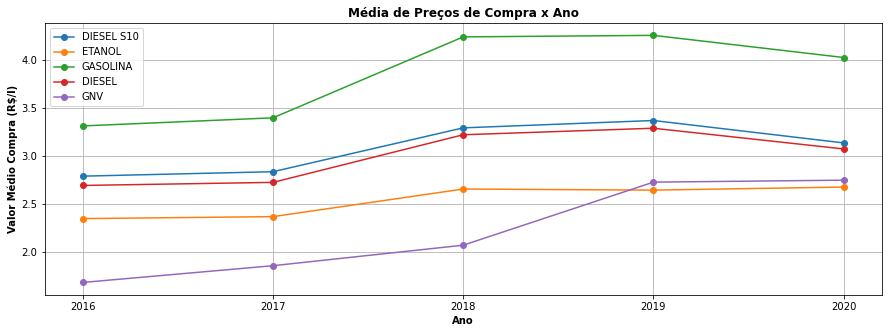

In [67]:
plot_chart_data_valor_por_produto(df_compra, "Valor_Compra_Litro_Em_Reais", "Compra")

**5.1.1 Correlação entre Data Coleta x Valores de Compra/Venda Por Produto (GASOLINA)**

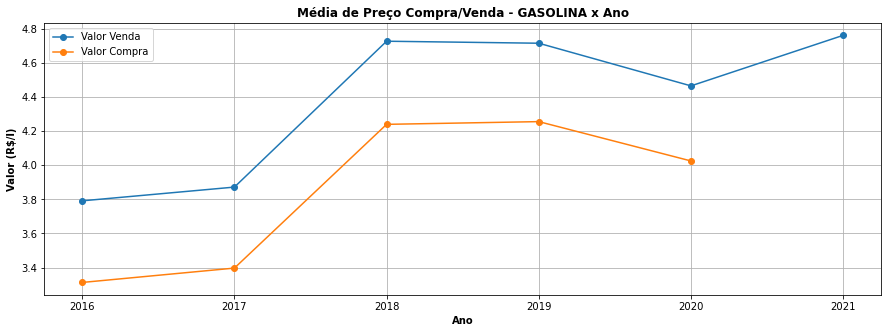

In [68]:
plot_chart_data_valor_por_produto_isolado(df, df_compra, "GASOLINA")

**5.1.2 Correlação entre Data Coleta x Valores de Compra/Venda de GASOLINA Separado por Região**

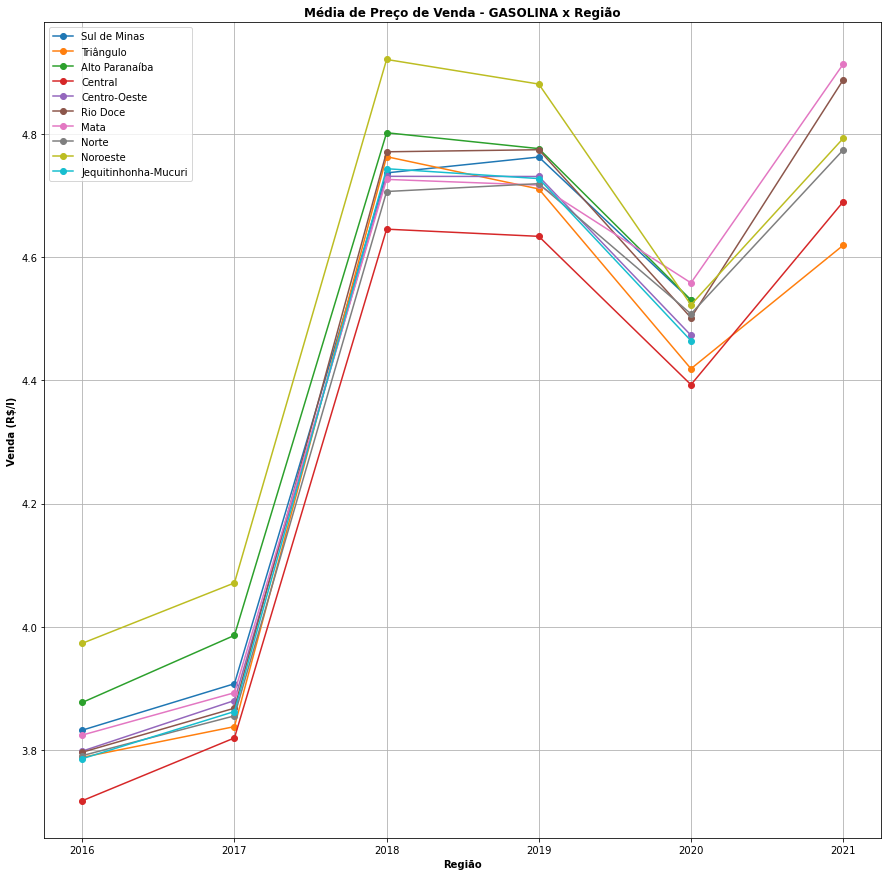

In [117]:
plot_chart_data_valor_por_produto_e_regiao(df, "GASOLINA", "Valor_Venda_Litro_Em_Reais", "Venda")

**5.2.1 Correlação entre Data Coleta x Valores de Compra/Venda Por Produto (ETANOL)**

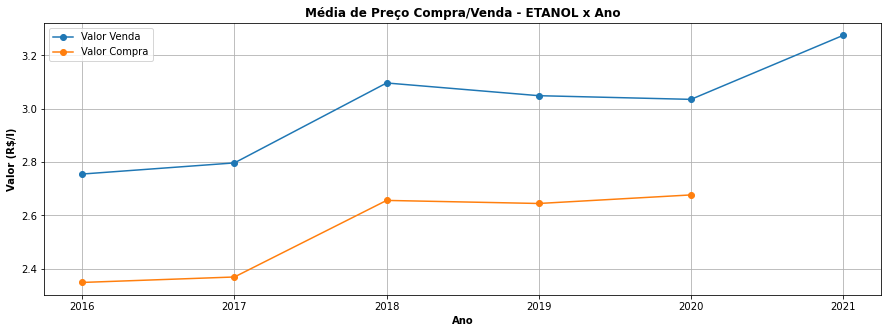

In [114]:
plot_chart_data_valor_por_produto_isolado(df, df_compra, "ETANOL")

**5.2.2 Correlação entre Data Coleta x Valores de Compra/Venda de ETANOL Separado por Região**

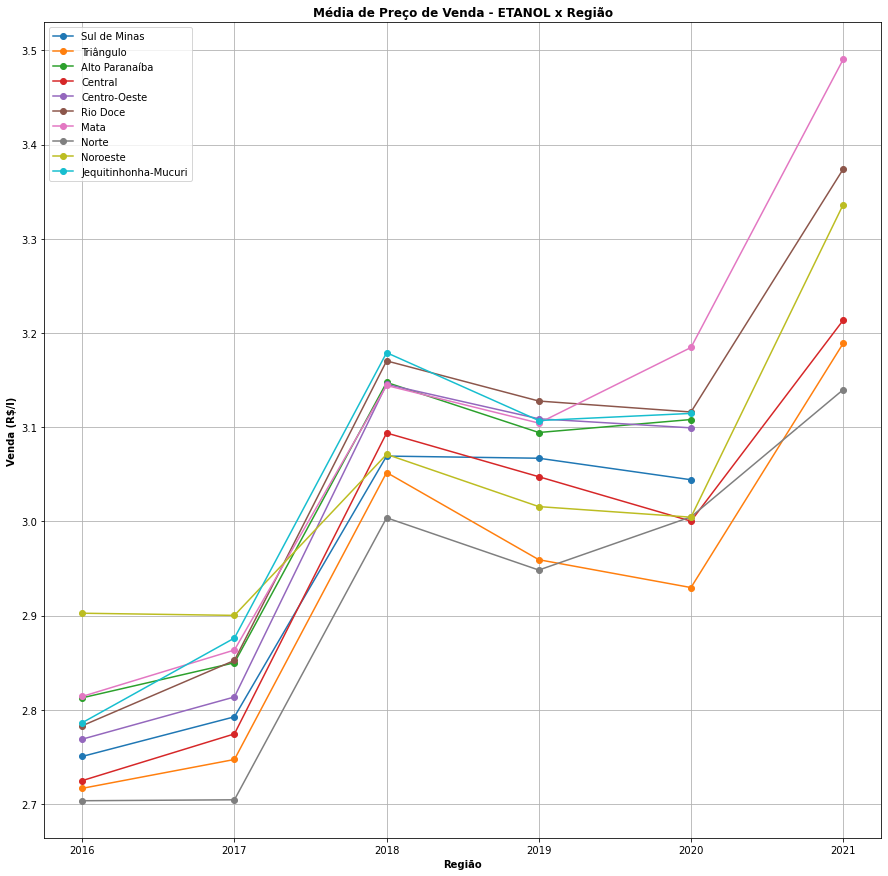

In [118]:
plot_chart_data_valor_por_produto_e_regiao(df, "ETANOL", "Valor_Venda_Litro_Em_Reais", "Venda")

**5.3.1 Correlação entre Data Coleta x Valores de Compra/Venda Por Produto (DIESEL)**

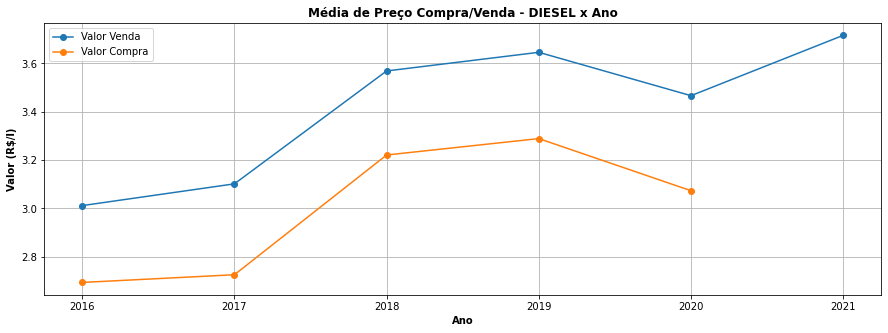

In [119]:
plot_chart_data_valor_por_produto_isolado(df, df_compra, "DIESEL")


**5.3.2 Correlação entre Data Coleta x Valores de Compra/Venda de DIESEL Separado por Região**

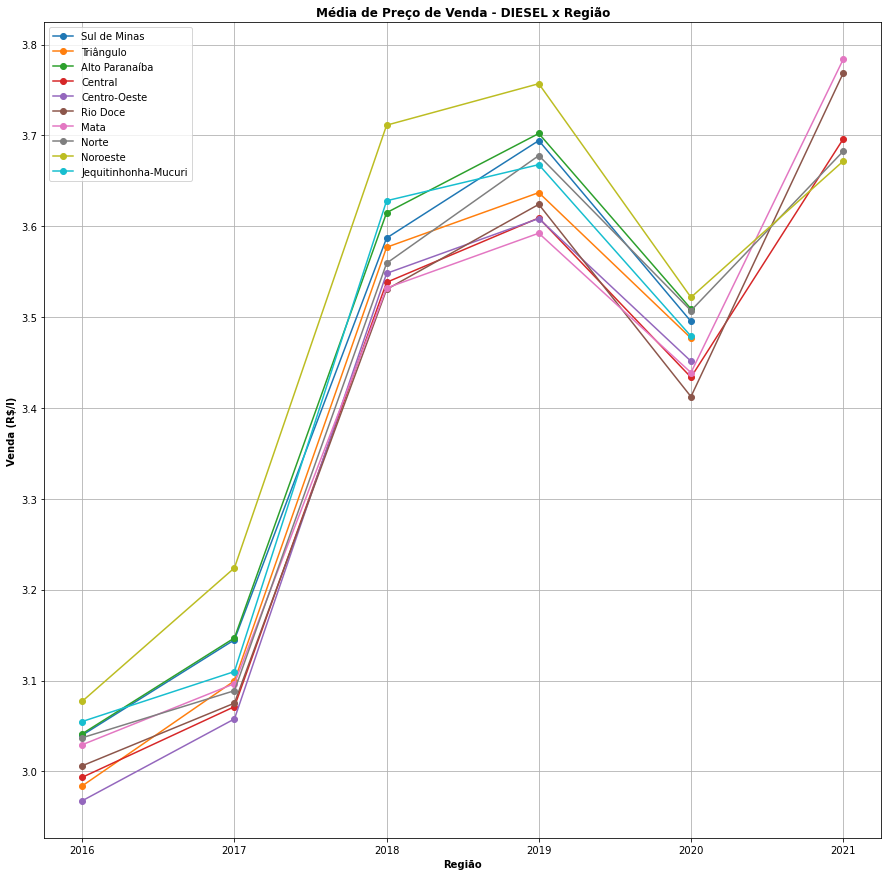

In [120]:
plot_chart_data_valor_por_produto_e_regiao(df, "DIESEL", "Valor_Venda_Litro_Em_Reais", "Venda")

**5.4.1 Correlação entre Data Coleta x Valores de Compra/Venda Por Produto (DIESEL S10)**

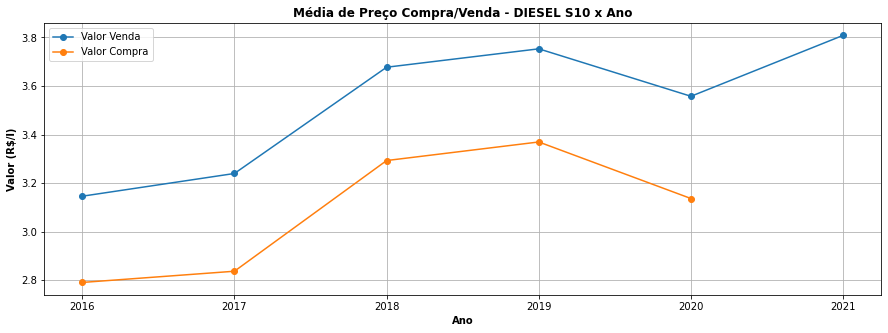

In [121]:
plot_chart_data_valor_por_produto_isolado(df, df_compra, "DIESEL S10")

**5.4.2 Correlação entre Data Coleta x Valores de Compra/Venda de DIESEL S10 Separado por Região**

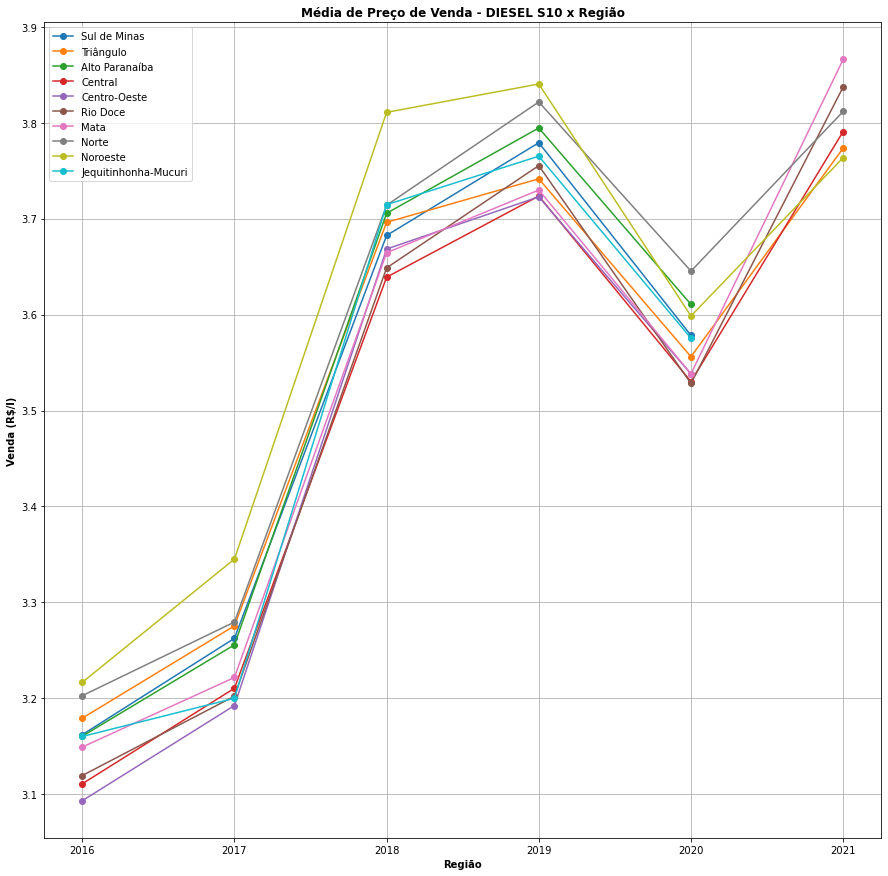

In [122]:
plot_chart_data_valor_por_produto_e_regiao(df, "DIESEL S10", "Valor_Venda_Litro_Em_Reais", "Venda")

**5.5.1 Correlação entre Data Coleta x Valores de Compra/Venda Por Produto (GNV)**

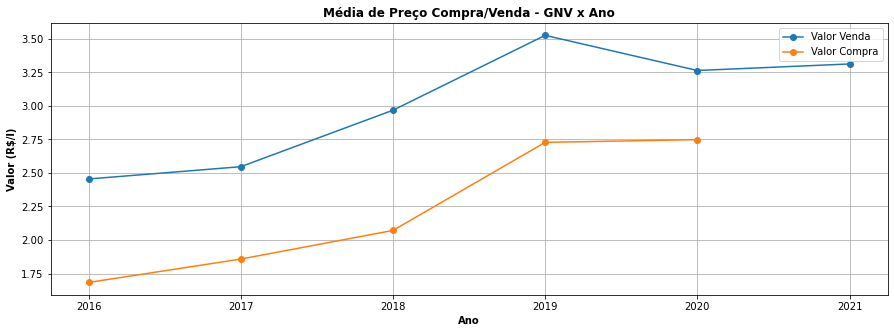

In [123]:
plot_chart_data_valor_por_produto_isolado(df, df_compra, "GNV")

**5.5.2 Correlação entre Data Coleta x Valores de Compra/Venda de GNV Separado por Região**

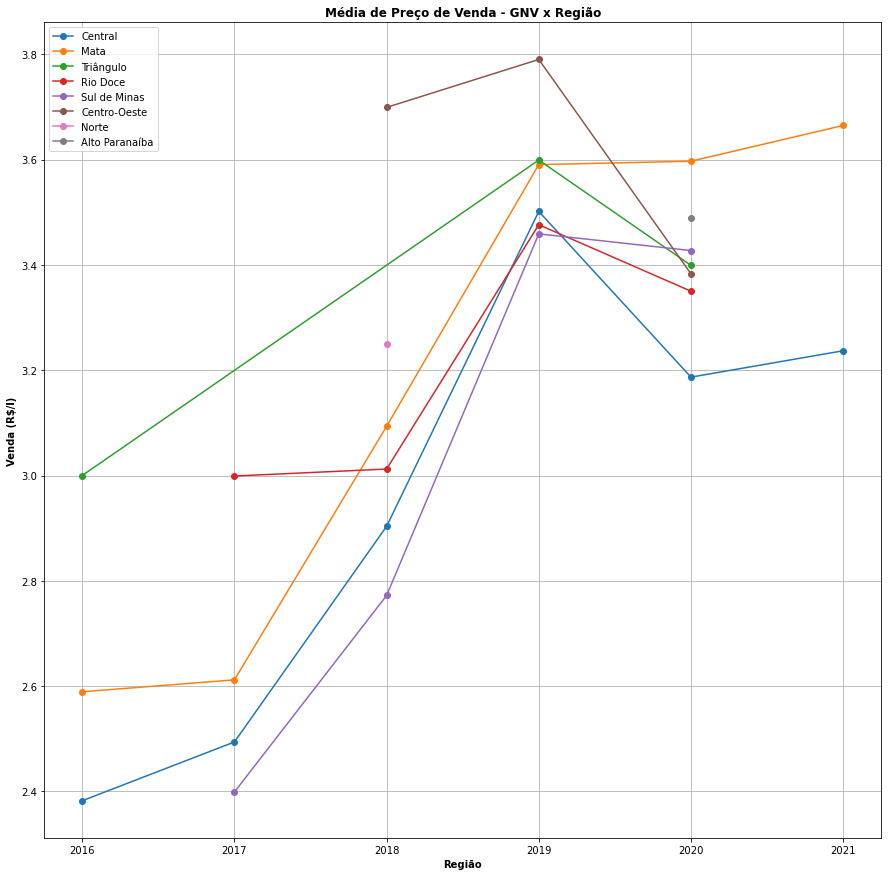

In [124]:
plot_chart_data_valor_por_produto_e_regiao(df, "GNV", "Valor_Venda_Litro_Em_Reais", "Venda")

**5.6 Correlação entre o Valor de Compra e de Venda Por Produto**

In [160]:
def plot_scatter_produto(df):  
    fig, ax = plt.subplots(3,2, figsize=(15,10), sharex=True, sharey=True)
    produtos = df["Produto"].unique()
    col = 0
    row = 0
    
    for produto in produtos:
        df_prod = df[df["Produto"] == produto]
        anos_produto = df_prod["Ano_Coleta"].unique()
        cores = ["red", "green", "blue", "brown", "orange"]
        for idx in range(1, len(anos_produto) + 1):
            ano = anos_produto[idx - 1]
            cor = cores[idx - 1]
            x = df_prod[df_prod["Ano_Coleta"] == ano]["Valor_Venda_Litro_Em_Reais"]
            y = df_prod[df_prod["Ano_Coleta"] == ano]["Valor_Compra_Litro_Em_Reais"]
            ax[row, col].scatter(x, y, c=cor, label=ano,
                   alpha=0.3, edgecolors='none')        
            ax[row, col].legend()            
            ax[row, col].set_title(produto)            
        col = col + 1
        if col > 1:
            col = 0
            row = row + 1               
    
    ax[1, 0].set_ylabel("Valor Compra (R$/l)", fontweight='bold'); 
    
    fig.suptitle("Correlação Valor de Compra x Venda".format(produto), fontweight='bold')
    fig.text(0.5, 0.04, 'Valor Venda (R$/l)', ha='center',  fontweight='bold' )
    plt.savefig("img/correlacao_precos.png", bbox_inches = 'tight',pad_inches=0.5)      


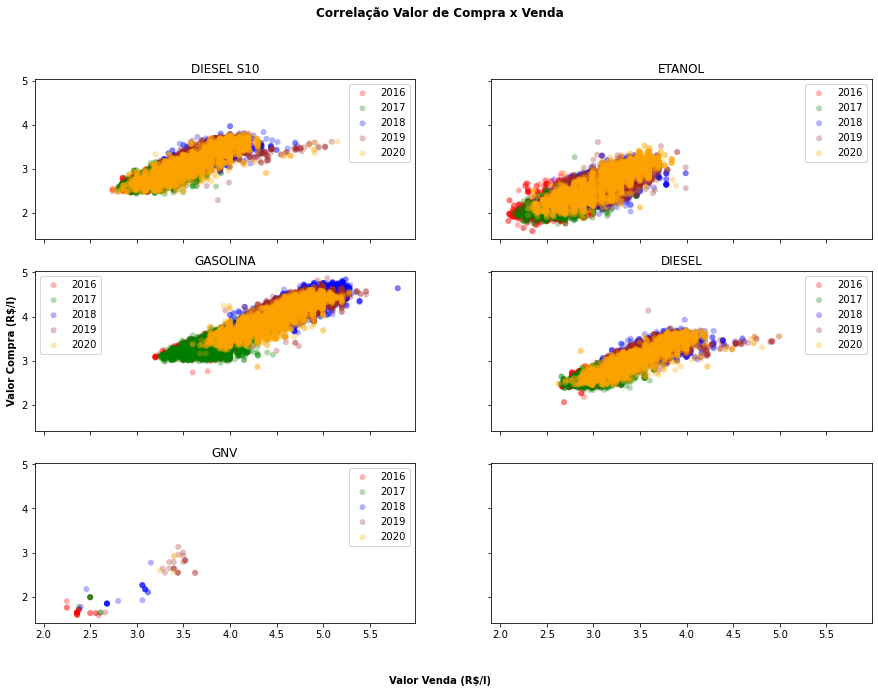

In [161]:
plot_scatter_produto(df_compra)

**5.7.1 Distribuicao de dados de Valor Compra/Venda Por Produto**

In [71]:
def plot_boxplot_produto(df, coluna_valor, label_coluna_valor):
    fig, ax = plt.subplots(figsize=(15,10))
    produtos = df["Produto"].unique()
    qtd_produtos = len(produtos)
    ax.boxplot([df[df["Produto"] == item][coluna_valor] for item in produtos], notch=True)
    ax.set_ylabel("Valor {} (R$/l)".format(label_coluna_valor), fontweight="bold")
    ax.set_xlabel("Produto", fontweight="bold")
    ax.set(xticklabels=produtos)
    plt.title("Distribuição de Valores de {} (Litros/R$) x Produto".format(label_coluna_valor), fontweight="bold")
    ax.margins(0.05)
    plt.savefig("img/boxplot_precos_{}_produto.png".format(label_coluna_valor), bbox_inches = 'tight',pad_inches =0.5)
    plt.show()

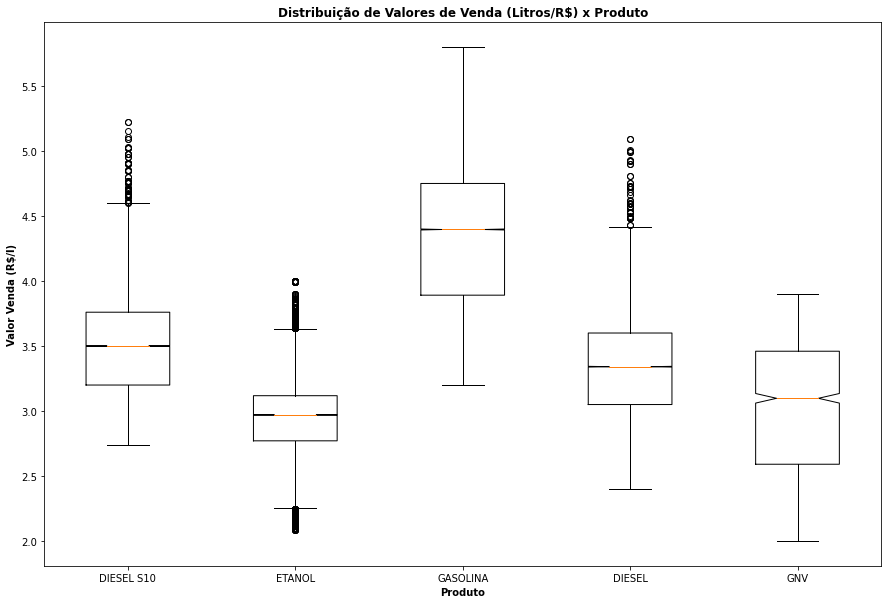

In [72]:
plot_boxplot_produto(df, "Valor_Venda_Litro_Em_Reais", "Venda")

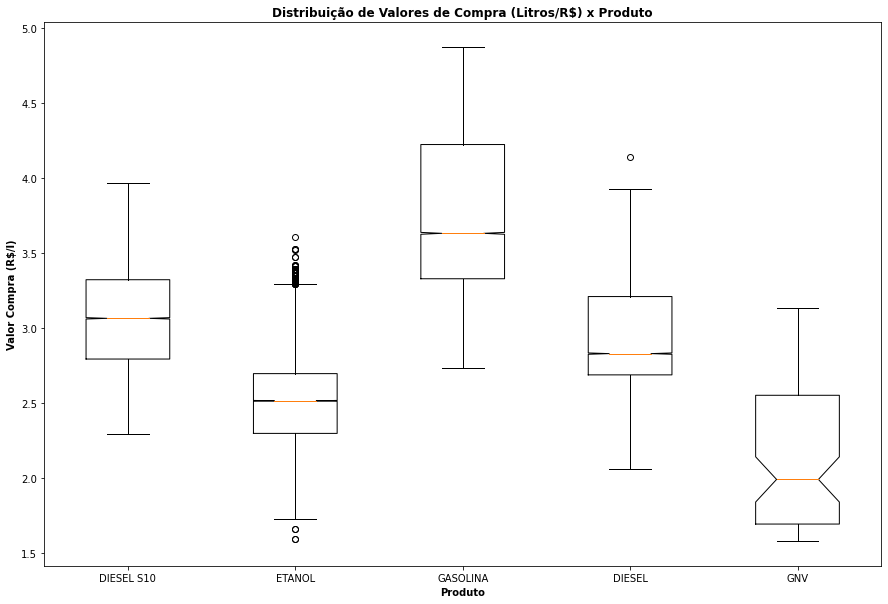

In [73]:
plot_boxplot_produto(df_compra, "Valor_Compra_Litro_Em_Reais", "Compra")

In [74]:
#validacao calculo de quartis
valores_gasolina = df[df["Produto"] == "GASOLINA"]["Valor_Venda_Litro_Em_Reais"]
valores_gasolina = valores_gasolina.sort_values()
valores_gasolina.iloc[136153]

5.799

In [75]:
#Remover Outliers
def remove_outliers_por_produto(df, produto, coluna_valor):
    novo_df = df
    Q1 = novo_df[novo_df["Produto"] == produto][coluna_valor].quantile(0.25)
    Q3 = novo_df[novo_df["Produto"] == produto][coluna_valor].quantile(0.75)
    IQR = Q3 - Q1    
    novo_df = novo_df[~((novo_df["Produto"] == produto) & (novo_df[coluna_valor] > (Q3 + 1.5 * IQR)))]
    novo_df = novo_df[~((novo_df["Produto"] == produto) & (novo_df[coluna_valor] < (Q1 - 1.5 * IQR)))]    
    
      
    return novo_df  


In [76]:
df_filtrado = remove_outliers_por_produto(df,"DIESEL", "Valor_Venda_Litro_Em_Reais")
df_filtrado = remove_outliers_por_produto(df_filtrado,"DIESEL S10", "Valor_Venda_Litro_Em_Reais")
df_filtrado = remove_outliers_por_produto(df_filtrado,"ETANOL", "Valor_Venda_Litro_Em_Reais")
df_filtrado[df_filtrado["Produto"] == "ETANOL"].describe()

,Valor_Venda_Litro_Em_Reais,Valor_Compra_Litro_Em_Reais,Ano_Coleta,Mes_Coleta,Dia_Coleta
count,136973.000000,136973.000000,136973.000000,136973.000000,136973.000000
mean,2.943806,0.235432,2017.884233,6.042403,15.617749
std,0.264662,1.681982,1.388186,3.382445,8.720251
min,2.250000,-1.000000,2016.000000,1.000000,1.000000
25%,2.770000,-1.000000,2017.000000,3.000000,8.000000
50%,2.969000,-1.000000,2018.000000,6.000000,16.000000
75%,3.100000,2.337300,2019.000000,9.000000,23.000000
max,3.633000,3.607600,2021.000000,12.000000,31.000000


In [77]:
df_compra_filtrado = remove_outliers_por_produto(df_compra,"DIESEL", "Valor_Compra_Litro_Em_Reais")
df_compra_filtrado = remove_outliers_por_produto(df_compra_filtrado,"DIESEL S10", "Valor_Compra_Litro_Em_Reais")
df_compra_filtrado = remove_outliers_por_produto(df_compra_filtrado,"ETANOL", "Valor_Compra_Litro_Em_Reais")
df_compra_filtrado[df_compra_filtrado["Produto"] == "ETANOL"].describe()

,Valor_Venda_Litro_Em_Reais,Valor_Compra_Litro_Em_Reais,Ano_Coleta,Mes_Coleta,Dia_Coleta
count,48503.000000,48503.000000,48503.000000,48503.000000,48503.000000
mean,2.926021,2.503868,2017.601159,6.073707,15.684576
std,0.270870,0.273921,1.340548,3.360452,8.731364
min,2.088000,1.723900,2016.000000,1.000000,1.000000
25%,2.739000,2.294700,2016.000000,3.000000,8.000000
50%,2.948000,2.511000,2017.000000,6.000000,16.000000
75%,3.099000,2.692450,2019.000000,9.000000,23.000000
max,3.990000,3.291000,2020.000000,12.000000,31.000000


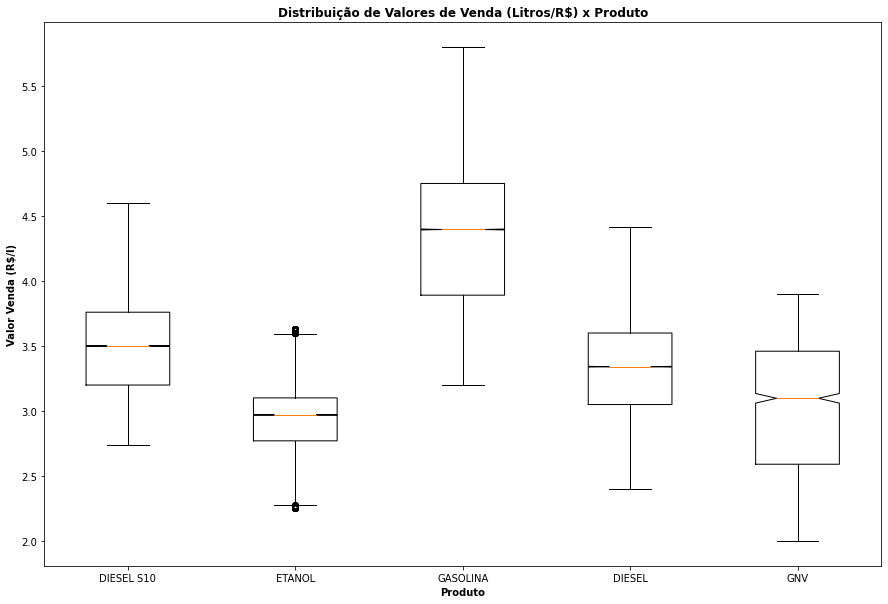

In [78]:
plot_boxplot_produto(df_filtrado,"Valor_Venda_Litro_Em_Reais", "Venda")

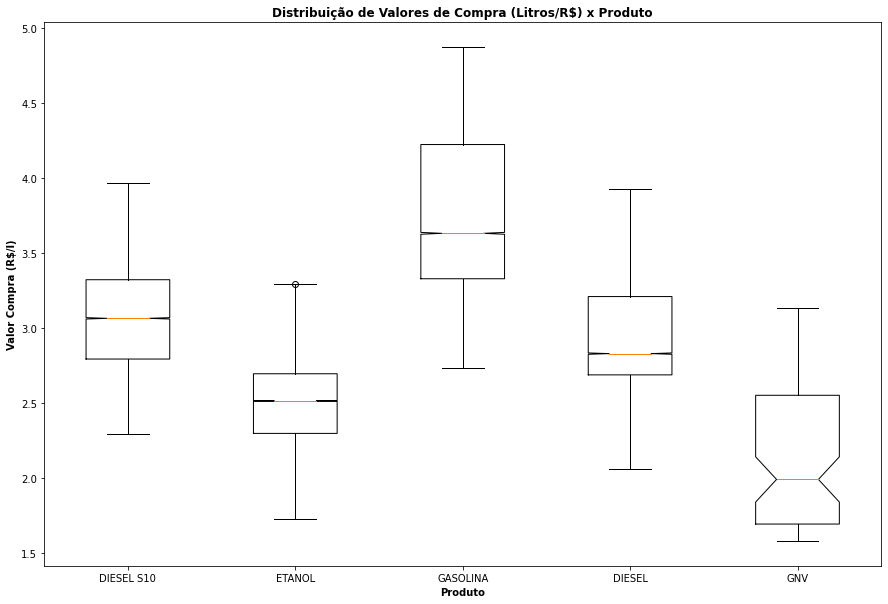

In [116]:
plot_boxplot_produto(df_compra_filtrado,"Valor_Compra_Litro_Em_Reais", "Compra")

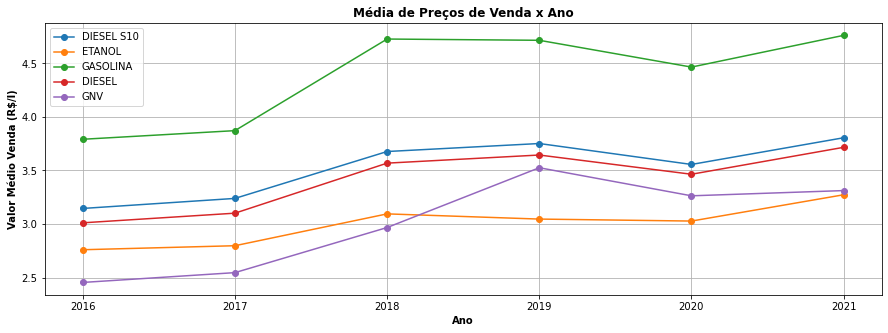

In [117]:
plot_chart_data_valor_por_produto(df_filtrado, "Valor_Venda_Litro_Em_Reais", "Venda")

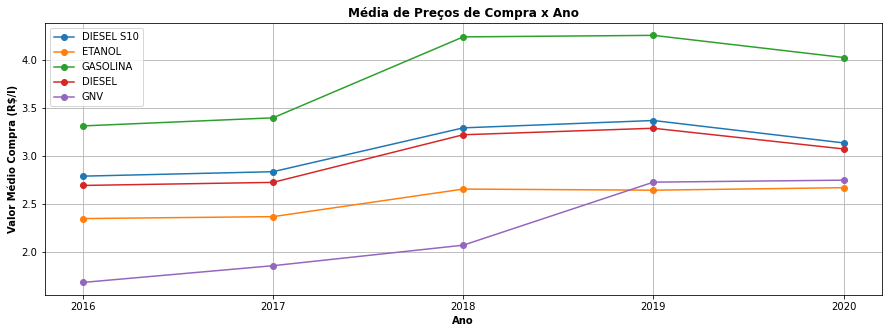

In [118]:
plot_chart_data_valor_por_produto(df_compra_filtrado, "Valor_Compra_Litro_Em_Reais", "Compra")

**5.8 Valores Mínimos e Máximos de Compra/Venda Por Produto**

**5.8.1 Valores Máximos de Valor de Venda Por Produto**

In [129]:
df_maior_preco_venda_produto = df.sort_values('Valor_Venda_Litro_Em_Reais', ascending = False)\
                                        .groupby(["Produto"]).head(1)
df_maior_preco_venda_produto

,Produto,Data_Coleta,Valor_Venda_Litro_Em_Reais,Valor_Compra_Litro_Em_Reais,Ano_Coleta,Mes_Coleta,Dia_Coleta,Mes_Ano_Coleta,Nome_Regiao,Municipio,Classe_Venda_Litro_Em_Reais
287569,GASOLINA,2018-09-27,5.799,4.6424,2018,9,27,2018-09,Noroeste,UNAÍ,"[5.419, 5.803)"
461669,DIESEL S10,2020-11-18,5.221,-1.0000,2020,11,18,2020-11,Norte,MONTES CLAROS,"[5.039, 5.419)"
461458,DIESEL,2020-11-18,5.090,-1.0000,2020,11,18,2020-11,Norte,MONTES CLAROS,"[5.039, 5.419)"
407839,ETANOL,2020-02-06,3.999,-1.0000,2020,2,6,2020-02,Central,CONTAGEM,"[3.899, 4.279)"
273943,GNV,2018-12-04,3.899,-1.0000,2018,12,4,2018-12,Sul de Minas,POÇOS DE CALDAS,"[3.899, 4.279)"


**5.8.2 Valores Mínimos de Valor de Venda Por Produto**

In [130]:
df_menor_preco_venda_produto = df.sort_values('Valor_Venda_Litro_Em_Reais', ascending = True)\
                                        .groupby(["Produto"]).head(1)
df_menor_preco_venda_produto.head()

,Produto,Data_Coleta,Valor_Venda_Litro_Em_Reais,Valor_Compra_Litro_Em_Reais,Ano_Coleta,Mes_Coleta,Dia_Coleta,Mes_Ano_Coleta,Nome_Regiao,Municipio,Classe_Venda_Litro_Em_Reais
145380,GNV,2017-01-17,1.999,-1.0000,2017,1,17,2017-01,Central,SANTA LUZIA,"[1.999, 2.379)"
35981,ETANOL,2016-05-31,2.088,-1.0000,2016,5,31,2016-05,Sul de Minas,POÇOS DE CALDAS,"[1.999, 2.379)"
182686,DIESEL,2017-07-17,2.400,-1.0000,2017,7,17,2017-07,Central,SETE LAGOAS,"[2.379, 2.759)"
95429,DIESEL S10,2016-12-05,2.739,2.4952,2016,12,5,2016-12,Central,SETE LAGOAS,"[2.379, 2.759)"
57963,GASOLINA,2016-09-14,3.199,3.0890,2016,9,14,2016-09,Central,BELO HORIZONTE,"[3.139, 3.519)"


**5.8.3 Valores Máximos de Valor de Compra Por Produto**

In [131]:
df_maior_preco_compra_produto = df_compra.sort_values('Valor_Compra_Litro_Em_Reais', ascending = False)\
                                        .groupby(["Produto"]).head(1)
df_maior_preco_compra_produto

,Produto,Data_Coleta,Valor_Venda_Litro_Em_Reais,Valor_Compra_Litro_Em_Reais,Ano_Coleta,Mes_Coleta,Dia_Coleta,Mes_Ano_Coleta,Nome_Regiao,Municipio,Classe_Venda_Litro_Em_Reais,Classe_Compra_Litro_Em_Reais
341218,GASOLINA,2019-05-20,5.044,4.8720,2019,5,20,2019-05,Mata,VIÇOSA,"[5.039, 5.419)","[4.542, 4.875)"
315674,DIESEL,2019-04-08,3.589,4.1360,2019,4,8,2019-04,Mata,LEOPOLDINA,"[3.519, 3.899)","[3.883, 4.213)"
259972,DIESEL S10,2018-10-31,4.000,3.9655,2018,10,31,2018-10,Norte,JANUÁRIA,"[3.899, 4.279)","[3.883, 4.213)"
374172,ETANOL,2019-10-15,3.048,3.6076,2019,10,15,2019-10,Noroeste,PARACATU,"[2.759, 3.139)","[3.554, 3.883)"
372371,GNV,2019-10-09,3.444,3.1277,2019,10,9,2019-10,Central,BELO HORIZONTE,"[3.139, 3.519)","[2.895, 3.224)"


**5.8.4 Valores Mínimos de Valor de Compra Por Produto**

In [135]:
df_menor_preco_compra_produto = df_compra.sort_values('Valor_Compra_Litro_Em_Reais', ascending = True)\
                                        .groupby(["Produto"]).head(1)
df_menor_preco_compra_produto

,Produto,Data_Coleta,Valor_Venda_Litro_Em_Reais,Valor_Compra_Litro_Em_Reais,Ano_Coleta,Mes_Coleta,Dia_Coleta,Mes_Ano_Coleta,Nome_Regiao,Municipio,Classe_Venda_Litro_Em_Reais,Classe_Compra_Litro_Em_Reais
24935,GNV,2016-06-27,2.590,1.5766,2016,6,27,2016-06,Mata,JUIZ DE FORA,"[2.379, 2.759)","[1.577, 1.906)"
21507,ETANOL,2016-05-23,2.350,1.5887,2016,5,23,2016-05,Triângulo,ITUIUTABA,"[1.999, 2.379)","[1.577, 1.906)"
14953,DIESEL,2016-05-30,2.684,2.0590,2016,5,30,2016-05,Centro-Oeste,FORMIGA,"[2.379, 2.759)","[1.906, 2.236)"
362818,DIESEL S10,2019-09-25,3.869,2.2900,2019,9,25,2019-09,Sul de Minas,POÇOS DE CALDAS,"[3.519, 3.899)","[2.236, 2.565)"
4644,GASOLINA,2016-03-31,3.599,2.7339,2016,3,31,2016-03,Central,BELO HORIZONTE,"[3.519, 3.899)","[2.565, 2.895)"


**5.9  Munícipios com Top's 10 Mínimos e Máximos de Venda Por Produto**

In [272]:
def plot_top_municipios_produto(df, produto, ascending = True):
    df_novo = df
    df_novo = df_novo[df_novo["Produto"] == produto].groupby(["Produto", "Municipio"]).mean()\
    .sort_values('Valor_Venda_Litro_Em_Reais', ascending = ascending)\
    .head(10)
    df_novo.reset_index(inplace=True)    
    fig, ax = plt.subplots(figsize=(15,5))
    maior_menor = "Menores" if ascending else "Maiores";
    ax.set_title("Top 10 {} Médias de Preços de {}".format(maior_menor, produto), fontweight='bold') 
    plt.plot(df_novo['Municipio'], df_novo['Valor_Venda_Litro_Em_Reais'])
    plt.xlabel("Munícipio", fontweight='bold')
    plt.ylabel("Valor Venda (R$/l)", fontweight='bold')
    plt.xticks(rotation=45)
    ax.grid()
    plt.savefig("img/top_10_{}_media_precos_{}_municipio.png".format(maior_menor,produto), bbox_inches = 'tight',pad_inches =0.5)  
    plt.show()
    
    

**5.9.1 Top 10 Municípios - Média de Preço de Venda Gasolina**

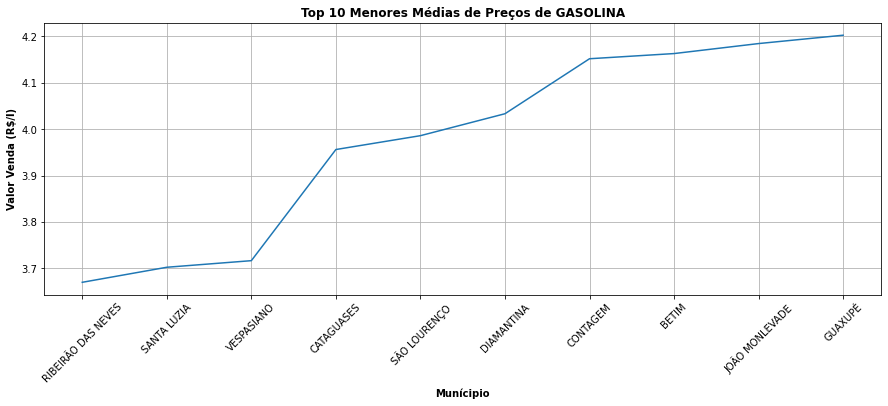

In [273]:
plot_top_municipios_produto(df, "GASOLINA")

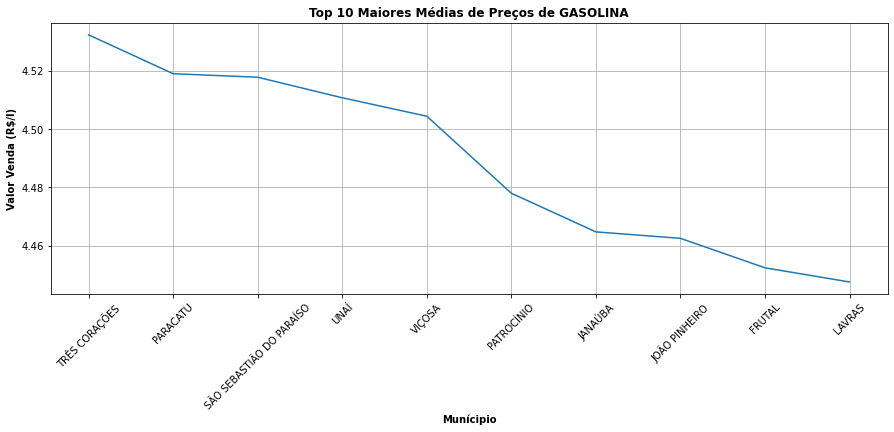

In [274]:
plot_top_municipios_produto(df, "GASOLINA", False)

**5.9.2 Top 10 Municípios - Média de Preço de Venda Etanol**

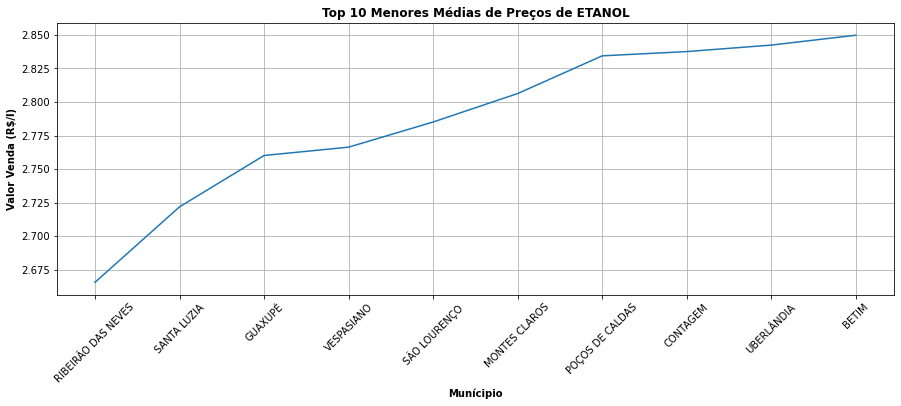

In [280]:
plot_top_municipios_produto(df, "ETANOL")

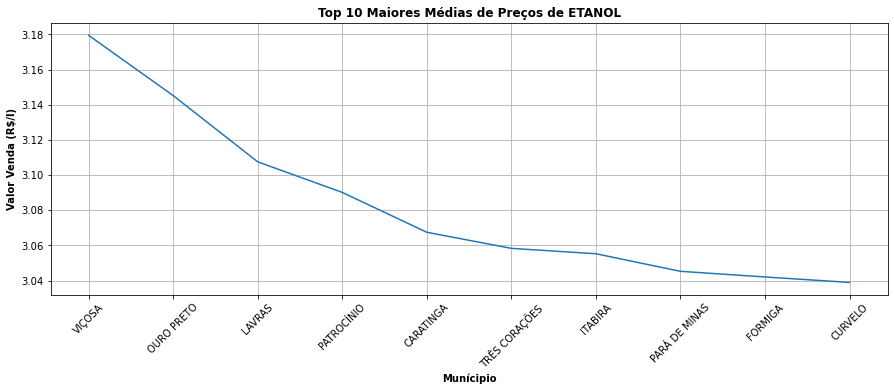

In [281]:
plot_top_municipios_produto(df, "ETANOL", False)

**5.9.3 Top 10 Municípios - Média de Preço de Venda Diesel**

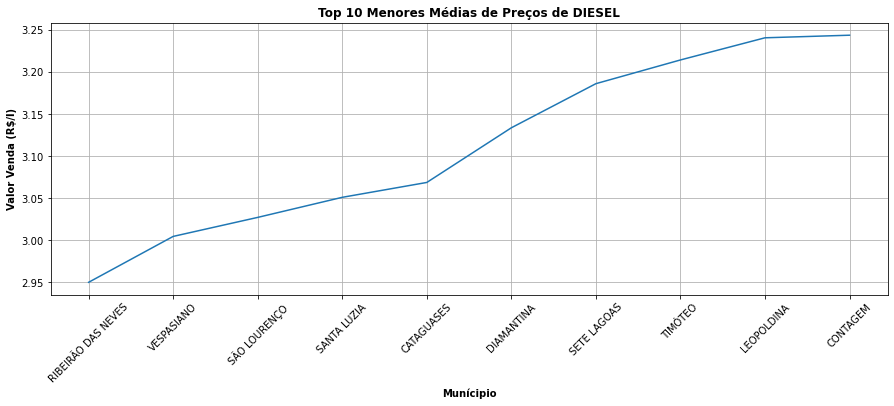

In [282]:
plot_top_municipios_produto(df, "DIESEL")

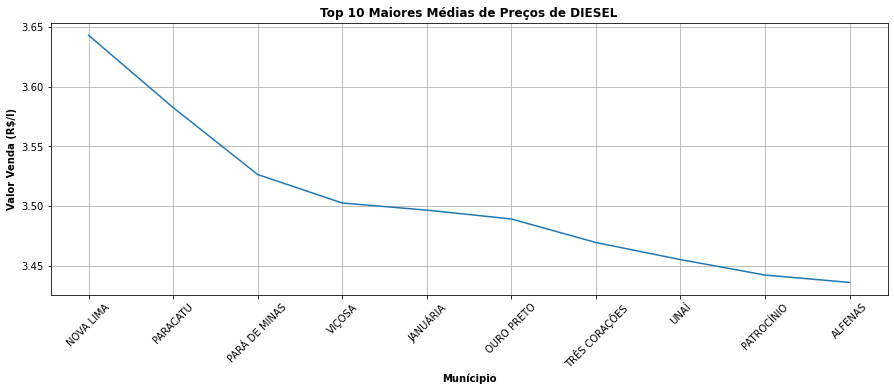

In [283]:
plot_top_municipios_produto(df, "DIESEL", False)

**5.9.4 Top 10 Municípios - Média de Preço de Venda Diesel S10**

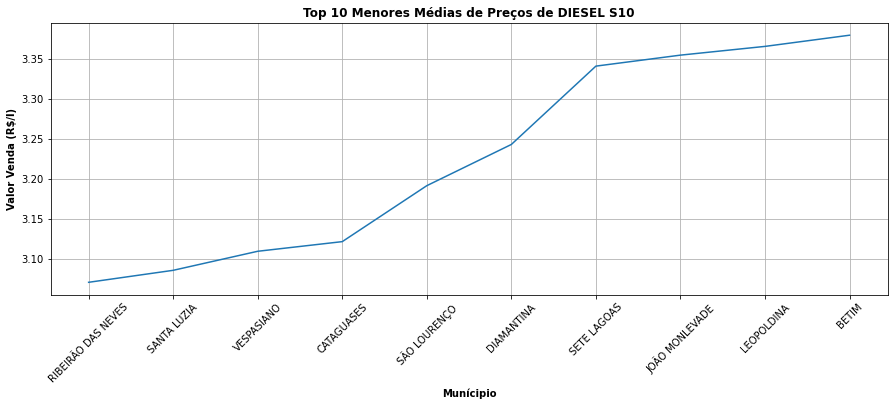

In [284]:
plot_top_municipios_produto(df, "DIESEL S10")

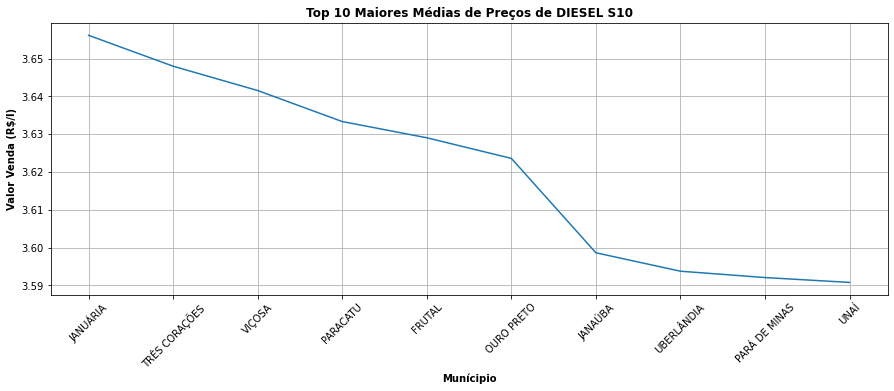

In [285]:
plot_top_municipios_produto(df, "DIESEL S10", False)

**5.9.5 Top 10 Municípios - Média de Preço de Venda GNV**

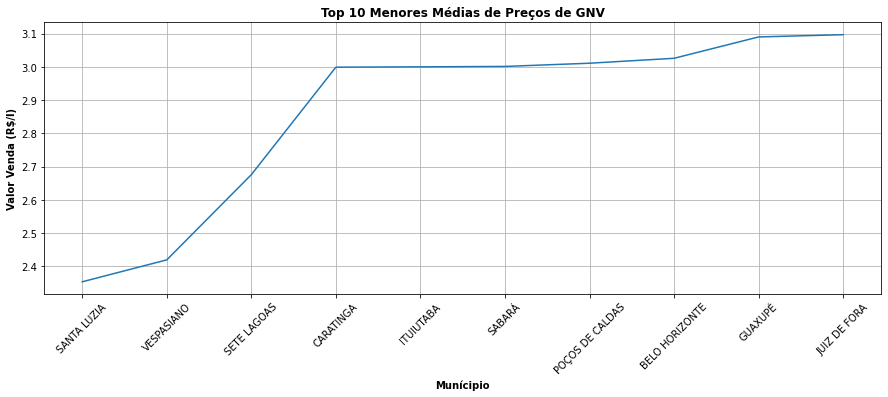

In [286]:
plot_top_municipios_produto(df, "GNV")

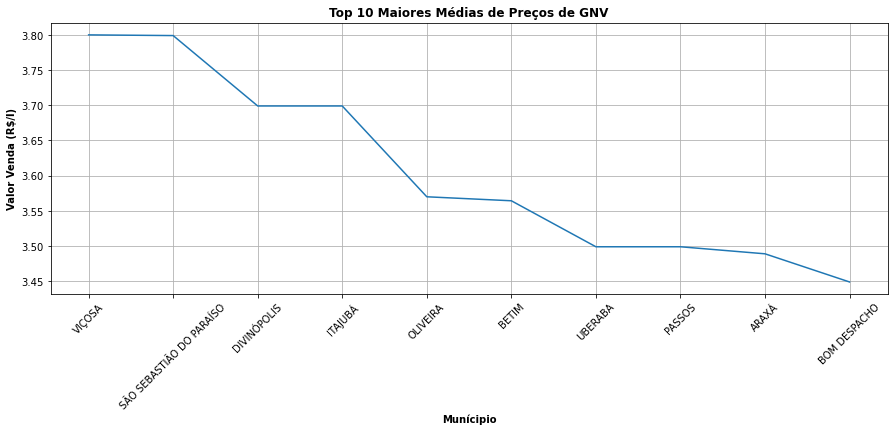

In [276]:
plot_top_municipios_produto(df, "GNV", False)